In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from time import perf_counter 
import os
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
## Defining batch specfications
batch_size = 16
img_height = 480
img_width = 640

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
## loading training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Shareddrives/Gdrive 3/latest_sunday/train',
    seed=40,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    #color_mode='grayscale'

)
# train_ds.class_names[0] = ['Accident']
# train_ds.class_names[1] = ['Non-Accident']
class_names=train_ds.class_names
print(class_names)

Found 1835 files belonging to 2 classes.
['class1', 'class2']


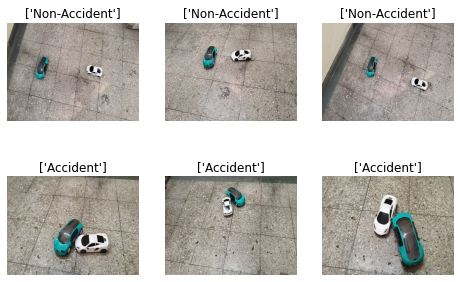

In [5]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
## loading validation dataset
val_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Shareddrives/Gdrive 3/latest_sunday/val',
    seed=40,
    #color_mode='grayscale',
    image_size= (img_height, img_width),
    batch_size=batch_size)


Found 460 files belonging to 2 classes.


In [7]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Shareddrives/Gdrive 3/latest_sunday/test',
    seed=40,
    #color_mode='grayscale',
    image_size= (img_height, img_width),
    batch_size=batch_size)
 
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
#Batch of 16 images of shape(720x1280x3)

Found 574 files belonging to 2 classes.
(16, 480, 640, 3)
(16,)


In [8]:
# # class_names = train_ds.class_names
# # print(class_names)
# plt.figure(figsize=(8, 8))
# for images, labels in training_set.take(1):
#   for i in range(6):
#     ax = plt.subplot(3, 3, i+1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [9]:
#Interested readers can learn more about both methods, 
#as well as how to cache data to disk in the Prefetching section of the 
#Better performance with the tf.data API guide
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
#testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
# normalization_layer = layers.Rescaling(1./255)
# # #use it
# # training_set = normalization_layer.flow_from_directory(train_ds)

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [11]:
## Defining model
# Different ways to classify image datasets:
# 1. Artificial Neural Network.
# 2. Convolutional Neural Network (done)
# 3. K nearest neighbor.
# 4. Decision tree.
# 5. Support Vector Machines
Model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model.summary()

In [12]:
# lets train our Model
retVal = Model.fit(train_ds, validation_data= val_ds, epochs = 10)

Epoch 1/10
115/115 [==============================] - 210s 1s/step - loss: 5.3114 - accuracy: 0.8845 - val_loss: 0.5701 - val_accuracy: 0.9304
Epoch 2/10
115/115 [==============================] - 37s 320ms/step - loss: 0.0748 - accuracy: 0.9722 - val_loss: 0.2915 - val_accuracy: 0.9435
Epoch 3/10
115/115 [==============================] - 36s 314ms/step - loss: 0.0302 - accuracy: 0.9880 - val_loss: 0.1759 - val_accuracy: 0.9609
Epoch 4/10
115/115 [==============================] - 36s 315ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0537 - val_accuracy: 0.9783
Epoch 5/10
115/115 [==============================] - 36s 314ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0796 - val_accuracy: 0.9804
Epoch 6/10
115/115 [==============================] - 36s 315ms/step - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.0567 - val_accuracy: 0.9891
Epoch 7/10
115/115 [==============================] - 36s 315ms/step - loss: 8.0328e-04 - accuracy: 1.0000 - val_loss: 0.0877 - val_

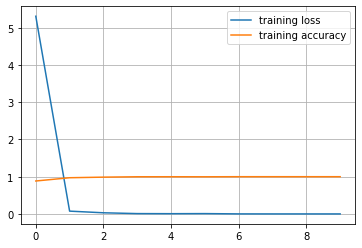

In [13]:
## stats on training data
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

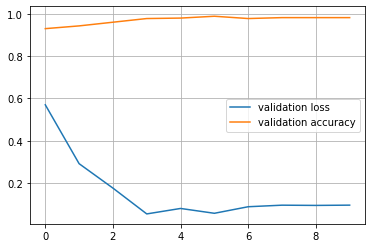

In [14]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

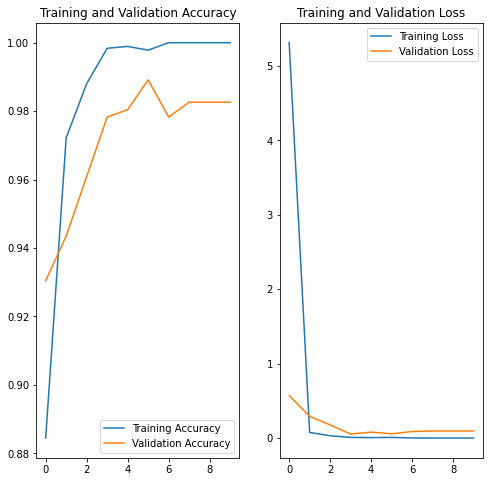

In [15]:
acc = retVal.history['accuracy']
val_acc = retVal.history['val_accuracy']

loss = retVal.history['loss']
val_loss = retVal.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
Model.evaluate(testing_ds,batch_size=16)

36/36 [==============================] - 160s 3s/step - loss: 0.0449 - accuracy: 0.9913


[0.04486648365855217, 0.9912891983985901]

In [17]:
#predict
y_pred=Model.predict(testing_ds)
y_pred=np.argmax(y_pred,axis=1)

36/36 [==============================] - 12s 253ms/step


In [29]:
# img = tf.keras.utils.load_img(
#     '/content/drive/Shareddrives/Gdrive 3/new/test/Accident/IMG20221111162951.jpg', target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = Model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
#)

1/1 [==============================] - 0s 61ms/step
[[1.6251511e-03 9.9837482e-01]
 [1.0000000e+00 1.8608418e-15]
 [9.9999714e-01 2.8110278e-06]
 [1.0000000e+00 3.0760389e-10]
 [4.3824480e-07 9.9999952e-01]
 [9.9999857e-01 1.4590145e-06]
 [2.3300381e-06 9.9999762e-01]
 [1.0000000e+00 4.4242245e-11]
 [9.5613068e-08 9.9999988e-01]
 [2.6524228e-07 9.9999976e-01]
 [9.2461227e-07 9.9999905e-01]
 [1.0000000e+00 6.4725898e-12]
 [9.9999952e-01 4.3444430e-07]
 [9.9994409e-01 5.5860892e-05]
 [6.1546626e-07 9.9999940e-01]
 [1.0000000e+00 3.3978688e-11]]


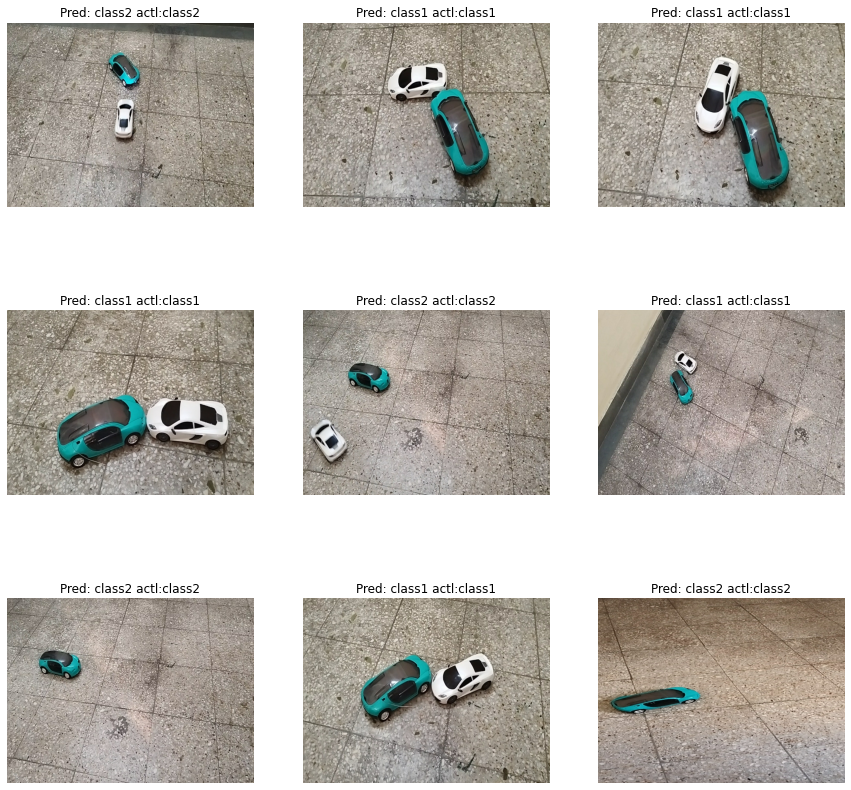

In [24]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(15, 15))
for images, labels in testing_ds.take(1):
    predictions = Model.predict(images)
    predlabel = []
    prdlbl = []
    
    
    for mem in predictions:
#        mem = tf.nn.softmax(predictions[0])
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]])
        plt.axis("off")
print(predictions)

In [27]:
#print(AccuracyVector)

In [23]:
  #  for i in range(40):
  #      ax = plt.subplot(10, 4, i + 1)
  #      plt.imshow(images[i].numpy().astype("uint8"))
  #      plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
  #      plt.axis('off')
  #      plt.grid(True)

In [25]:
Model.save('/content/drive/Shareddrives/Gdrive 3/latest_sunday/Model_lates_sunday.h5')

In [ ]:
#Model.save('\content\Model')

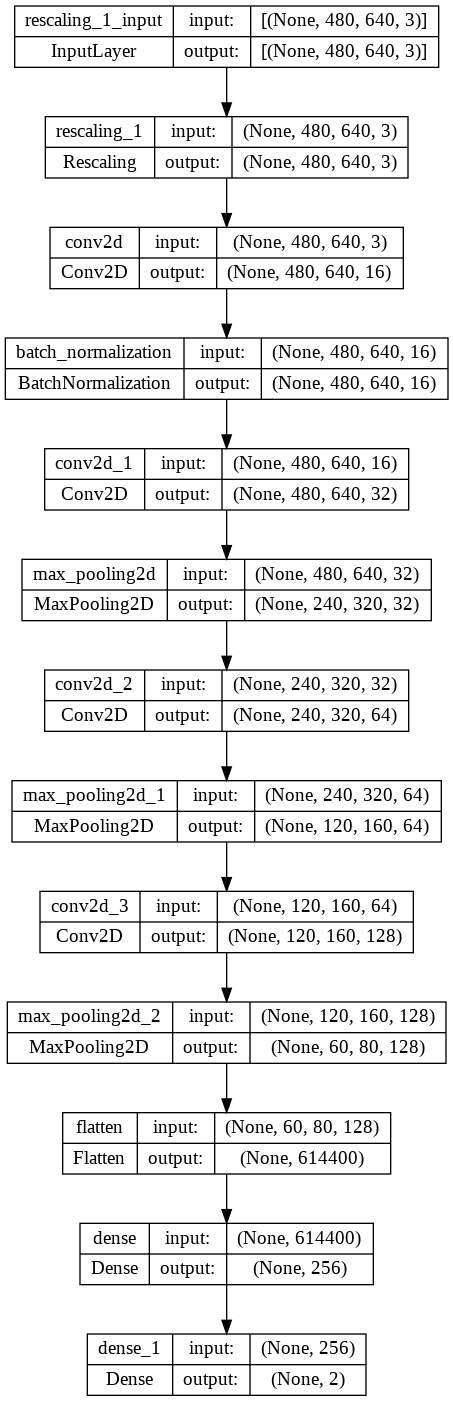

In [ ]:
plot_model(Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)